# Problem Statement

This case requires trainees to develop a customer segmentation to define
marketing strategy. The sample dataset summarizes the usage behaviour of about 9000
active credit card holders during the last 6 months. The file is at a customer level with
18 behavioural variables

# Data Features

***CUST_ID:*** Credit card holder ID

***BALANCE:*** Monthly average balance (based on daily balance averages)

***BALANCE_FREQUENCY:*** Ratio of last 12 months with balance

***PURCHASES:*** Total purchase amount spent during last 12 months

***ONEOFF_PURCHASES:*** Total amount of one-off purchases

***INSTALLMENTS_PURCHASES:*** Total amount of installment purchases

***CASH_ADVANCE:*** Total cash-advance amount

***PURCHASES_ FREQUENCY:*** Frequency of purchases (Percent of months with at least one purchase)

***ONEOFF_PURCHASES_FREQUENCY:*** Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases

***CASH_ADVANCE_ FREQUENCY:*** Cash-Advance frequency

***AVERAGE_PURCHASE_TRX:*** Average amount per purchase transaction

***CASH_ADVANCE_TRX:*** Average amount per cash-advance transaction

***PURCHASES_TRX:*** Average amount per purchase transaction

***CREDIT_LIMIT:*** Credit limit

***PAYMENTS:*** Total payments (due amount paid by the customer to decrease their statement balance) in the period

***MINIMUM_PAYMENTS:*** Total minimum payments due in the period.

***PRC_FULL_PAYMEN:*** Percentage of months with full payment of the due statement balance

***TENURE:*** Number of months as a customer

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA

# Exploratory Data Analysis

In [2]:
#Reading data
credit_data=pd.read_csv("G:\EdwisorFiles\Credit_Card\credit-card-data.csv")

In [3]:
print(credit_data.shape)

(8950, 18)


In [4]:
# Data contains 8950 rows and 18 columns, let's check the column names and their types
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
# Get total Null values
print("Total Null values present in data: ", credit_data.isnull().sum())
# Minimum payments has 313 and Credit_limit feature has 1 Null vale.
# Only two features has NULL values.

Total Null values present in data:  CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [6]:
credit_data.describe()
#In most of the featurs as we see that difference in 75 percentile value and max value is high, high probability of getting an outlier

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# Imputation
# In total we have 314 missing values, we can ignore them or impute them. I am going for imputation
# I will impute missing values using median for features CREDIT_LIMIT and MINIMUM_PAYMENTS
credit_data["CREDIT_LIMIT"].fillna(credit_data["CREDIT_LIMIT"].median(),inplace=True)
credit_data["MINIMUM_PAYMENTS"].fillna(credit_data["MINIMUM_PAYMENTS"].median(),inplace=True)
print(credit_data.isnull().sum())
#As we can see al na_values have been imputed

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


# Outlier Analysis

[0.0, 128.2819155, 873.385231, 2054.1400355]
points are outliers if below -2760.5052645 and above 4942.9272155


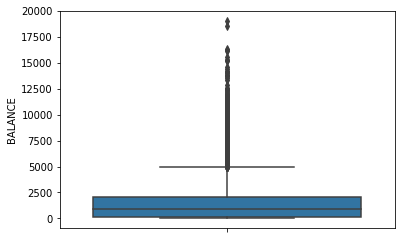

In [8]:
# Let's check the ooutliers for each continous/numerical variable with the help of box plot.
percentiles=list(np.percentile(credit_data['BALANCE'],np.arange(0,100,25)))
print(percentiles)
IQR=percentiles[3]-percentiles[1]
whisker_pos=percentiles[3]+(1.5*IQR)
whisker_neg=percentiles[1]-(1.5*IQR)
sns.boxplot( y=credit_data['BALANCE'])
print("points are outliers if below {0} and above {1}".format(whisker_neg,whisker_pos))

In [9]:
credit_copy=credit_data.copy()
credit_copy = credit_copy.drop(credit_copy[credit_copy.loc[:,'BALANCE'] > 4942.9272155].index)
credit_copy = credit_copy.drop(credit_copy[credit_copy.loc[:,'BALANCE'] < -2760.5052645].index)
print(credit_copy.shape)

(8255, 18)


[0.0, 39.635, 361.28, 1110.13]
points are outliers if below -1566.1075000000003 and above 2715.8725000000004


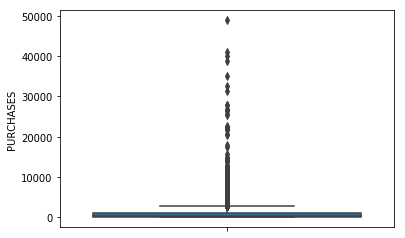

In [10]:
percentiles=list(np.percentile(credit_data['PURCHASES'],np.arange(0,100,25)))
print(percentiles)
IQR=percentiles[3]-percentiles[1]
whisker_pos=percentiles[3]+(1.5*IQR)
whisker_neg=percentiles[1]-(1.5*IQR)
sns.boxplot( y=credit_data['PURCHASES'])
print("points are outliers if below {0} and above {1}".format(whisker_neg,whisker_pos))

In [11]:

credit_copy = credit_copy.drop(credit_copy[credit_copy.loc[:,'PURCHASES'] > 2715.9272155].index)
credit_copy = credit_copy.drop(credit_copy[credit_copy.loc[:,'PURCHASES'] < -1566.5052645].index)
print(credit_copy.shape)

(7590, 18)


#### Observations :
     - As we can see huge loss of data is there just by removing outliers for 2 features.
     - Instead of removing outliers we can reduce the effect of outliers by applying logarithmic function.

In [12]:
# Applying logarithmic function to reeduce the effect of outliers
credit_data=credit_data.drop(["CUST_ID"],axis=1).applymap(lambda x: np.log(x+1))

# Deriving New KPI

#### Monthly average purchse

In [13]:
credit_data["map"]=credit_data["PURCHASES"]/credit_data["TENURE"]

In [14]:
print(credit_data['map'].head())
print("*********")
print("*********")
print("*********")
print(credit_data['PURCHASES'].head())
print("*********")
print("*********")
print("*********")
print(credit_data['TENURE'].head())
print(credit_data["map"].dtypes)
#Since Tenure is 12 months for all the data points, so it becomes more justifiable to use TENURE feature

0    1.781129
1    0.000000
2    2.593342
3    2.851214
4    1.104588
Name: map, dtype: float64
*********
*********
*********
0    4.568506
1    0.000000
2    6.651791
3    7.313220
4    2.833213
Name: PURCHASES, dtype: float64
*********
*********
*********
0    2.564949
1    2.564949
2    2.564949
3    2.564949
4    2.564949
Name: TENURE, dtype: float64
float64


### 1. Monthly cash advance Amount

In [15]:
credit_data["mca"]=credit_data["CASH_ADVANCE"]/credit_data["TENURE"]

In [16]:
print(credit_data['mca'].head())
print("*********")
print("*********")
print("*********")
print(credit_data['CASH_ADVANCE'].head())
print("*********")
print("*********")
print("*********")
print(credit_data['TENURE'].head())
print(credit_data["mca"].dtypes)

0    0.000000
1    3.419520
2    0.000000
3    2.078674
4    0.000000
Name: mca, dtype: float64
*********
*********
*********
0    0.000000
1    8.770896
2    0.000000
3    5.331694
4    0.000000
Name: CASH_ADVANCE, dtype: float64
*********
*********
*********
0    2.564949
1    2.564949
2    2.564949
3    2.564949
4    2.564949
Name: TENURE, dtype: float64
float64


### 2. Purchase by type(One-off installments)
######      This will help us to find type of purchases customers make on credit card

##### Limit usage (Balance to credit limit ratio)

In [17]:
print(credit_data["CREDIT_LIMIT"].dtypes)
credit_data['lu']=credit_data['BALANCE']/credit_data['CREDIT_LIMIT']

float64


In [18]:
credit_data['lu'].head()
# Small values represents good credit score, since that implies Balance is less compare to CRDIT Limit

0    0.540662
1    0.911697
2    0.876688
3    0.831487
4    0.945963
Name: lu, dtype: float64

###### Payments to minimum payment ratio

In [19]:
# Since we are aware that features 'PAYMENTS' and 'MINIMUM_PAYMENTS' doesn't have any null values
# We will create a new feature as pay_minPayratio i.e.
credit_data['pay_minpayratio']=credit_data['PAYMENTS']/credit_data['MINIMUM_PAYMENTS']

In [20]:
credit_data['pay_minpayratio'].head()

0    1.074203
1    1.192189
2    0.998706
3    0.000000
4    1.184692
Name: pay_minpayratio, dtype: float64

#### Let's check average and minpayment ratio for each purchase type

In [21]:
credit_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,map,mca,lu,pay_minpayratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,1.943593,1.329847,0.761605,1.216314
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,1.158342,1.437545,0.239009,3.129336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.459523,0.000000,0.605994,0.986088
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,2.337864,0.000000,0.855164,1.126461
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,2.782617,2.784937,0.958439,1.327066
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,4.651744,4.762706,1.699013,244.600537


In [22]:
# log tranformation of all the columns
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=credit_data[[x for x in credit_data.columns if x not in col ]]

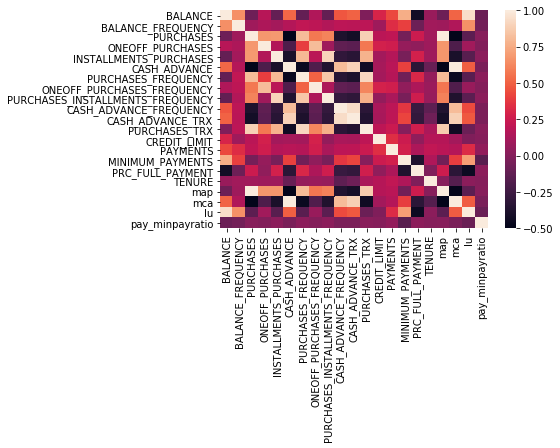

In [23]:
#Heat map to check correlation
sns.heatmap(credit_data.corr())

### Observations:
##### - It's clearly visible through heat map that most of the features are highly correlated to each other.
##### - We need to remove correlation between the features. We will apply PCA, before applying PCA we will go for standardizing the data.
##### - Features mentioned below are highly correlated to each other and we will reduce the dimensions
###### i. lu - Balance
###### ii. mca-Purchases
###### iii. mca - Installments_Purchases
###### iv. mca - Purchases_Frequency
###### v. map - Cash_Advance
###### vi. mca - Purchases_Installments-Frequency
###### vii. map - Cash_Advance_Frequency
###### viii. map - Cash_Advance_TRX
###### ix. map - Prc_Full_Payment

In [24]:
Final_CreditData = credit_data.loc[:,['BALANCE_FREQUENCY','ONEOFF_PURCHASES','ONEOFF_PURCHASES_FREQUENCY','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','map','mca','lu', 'pay_minpayratio']]
copy_data=credit_data[['BALANCE_FREQUENCY','ONEOFF_PURCHASES','ONEOFF_PURCHASES_FREQUENCY','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','map','mca','lu', 'pay_minpayratio']].copy()
print(Final_CreditData.head())

print(Final_CreditData.shape)
print(Final_CreditData.columns)

   BALANCE_FREQUENCY  ONEOFF_PURCHASES  ONEOFF_PURCHASES_FREQUENCY  \
0           0.597837          0.000000                    0.000000   
1           0.646627          0.000000                    0.000000   
2           0.693147          6.651791                    0.693147   
3           0.492477          7.313220                    0.080042   
4           0.693147          2.833213                    0.080042   

   CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS       map       mca        lu  \
0      6.908755  5.312231          4.945277  1.781129  0.000000  0.540662   
1      8.853808  8.319725          6.978531  0.000000  3.419520  0.911697   
2      8.922792  6.434654          6.442994  2.593342  0.000000  0.876688   
3      8.922792  0.000000          5.747301  2.851214  2.078674  0.831487   
4      7.090910  6.521114          5.504483  1.104588  0.000000  0.945963   

   pay_minpayratio  
0         1.074203  
1         1.192189  
2         0.998706  
3         0.000000  
4         1

## Standardizing the data

In [25]:
# All of the columns need to be scaled
for ithCol in Final_CreditData.columns:
    Final_CreditData[ithCol]=(Final_CreditData[ithCol] - min(Final_CreditData[ithCol]))/(max(Final_CreditData[ithCol]) - 
                              min(Final_CreditData[ithCol]))
Final_CreditData.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,map,mca,lu,pay_minpayratio
0,0.862497,0.000000,0.000000,0.466811,0.490324,0.438874,0.382895,0.000000,0.318221,0.004392
1,0.932886,0.000000,0.000000,0.771814,0.767919,0.620013,0.000000,0.717978,0.536604,0.004874
2,1.000000,0.626611,1.000000,0.782631,0.593925,0.572303,0.557499,0.000000,0.515998,0.004083
3,0.710494,0.688918,0.115477,0.782631,0.000000,0.510325,0.612934,0.436448,0.489394,0.000000
4,1.000000,0.266894,0.115477,0.495375,0.601905,0.488693,0.237457,0.000000,0.556772,0.004843


D:\Python3_AI\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


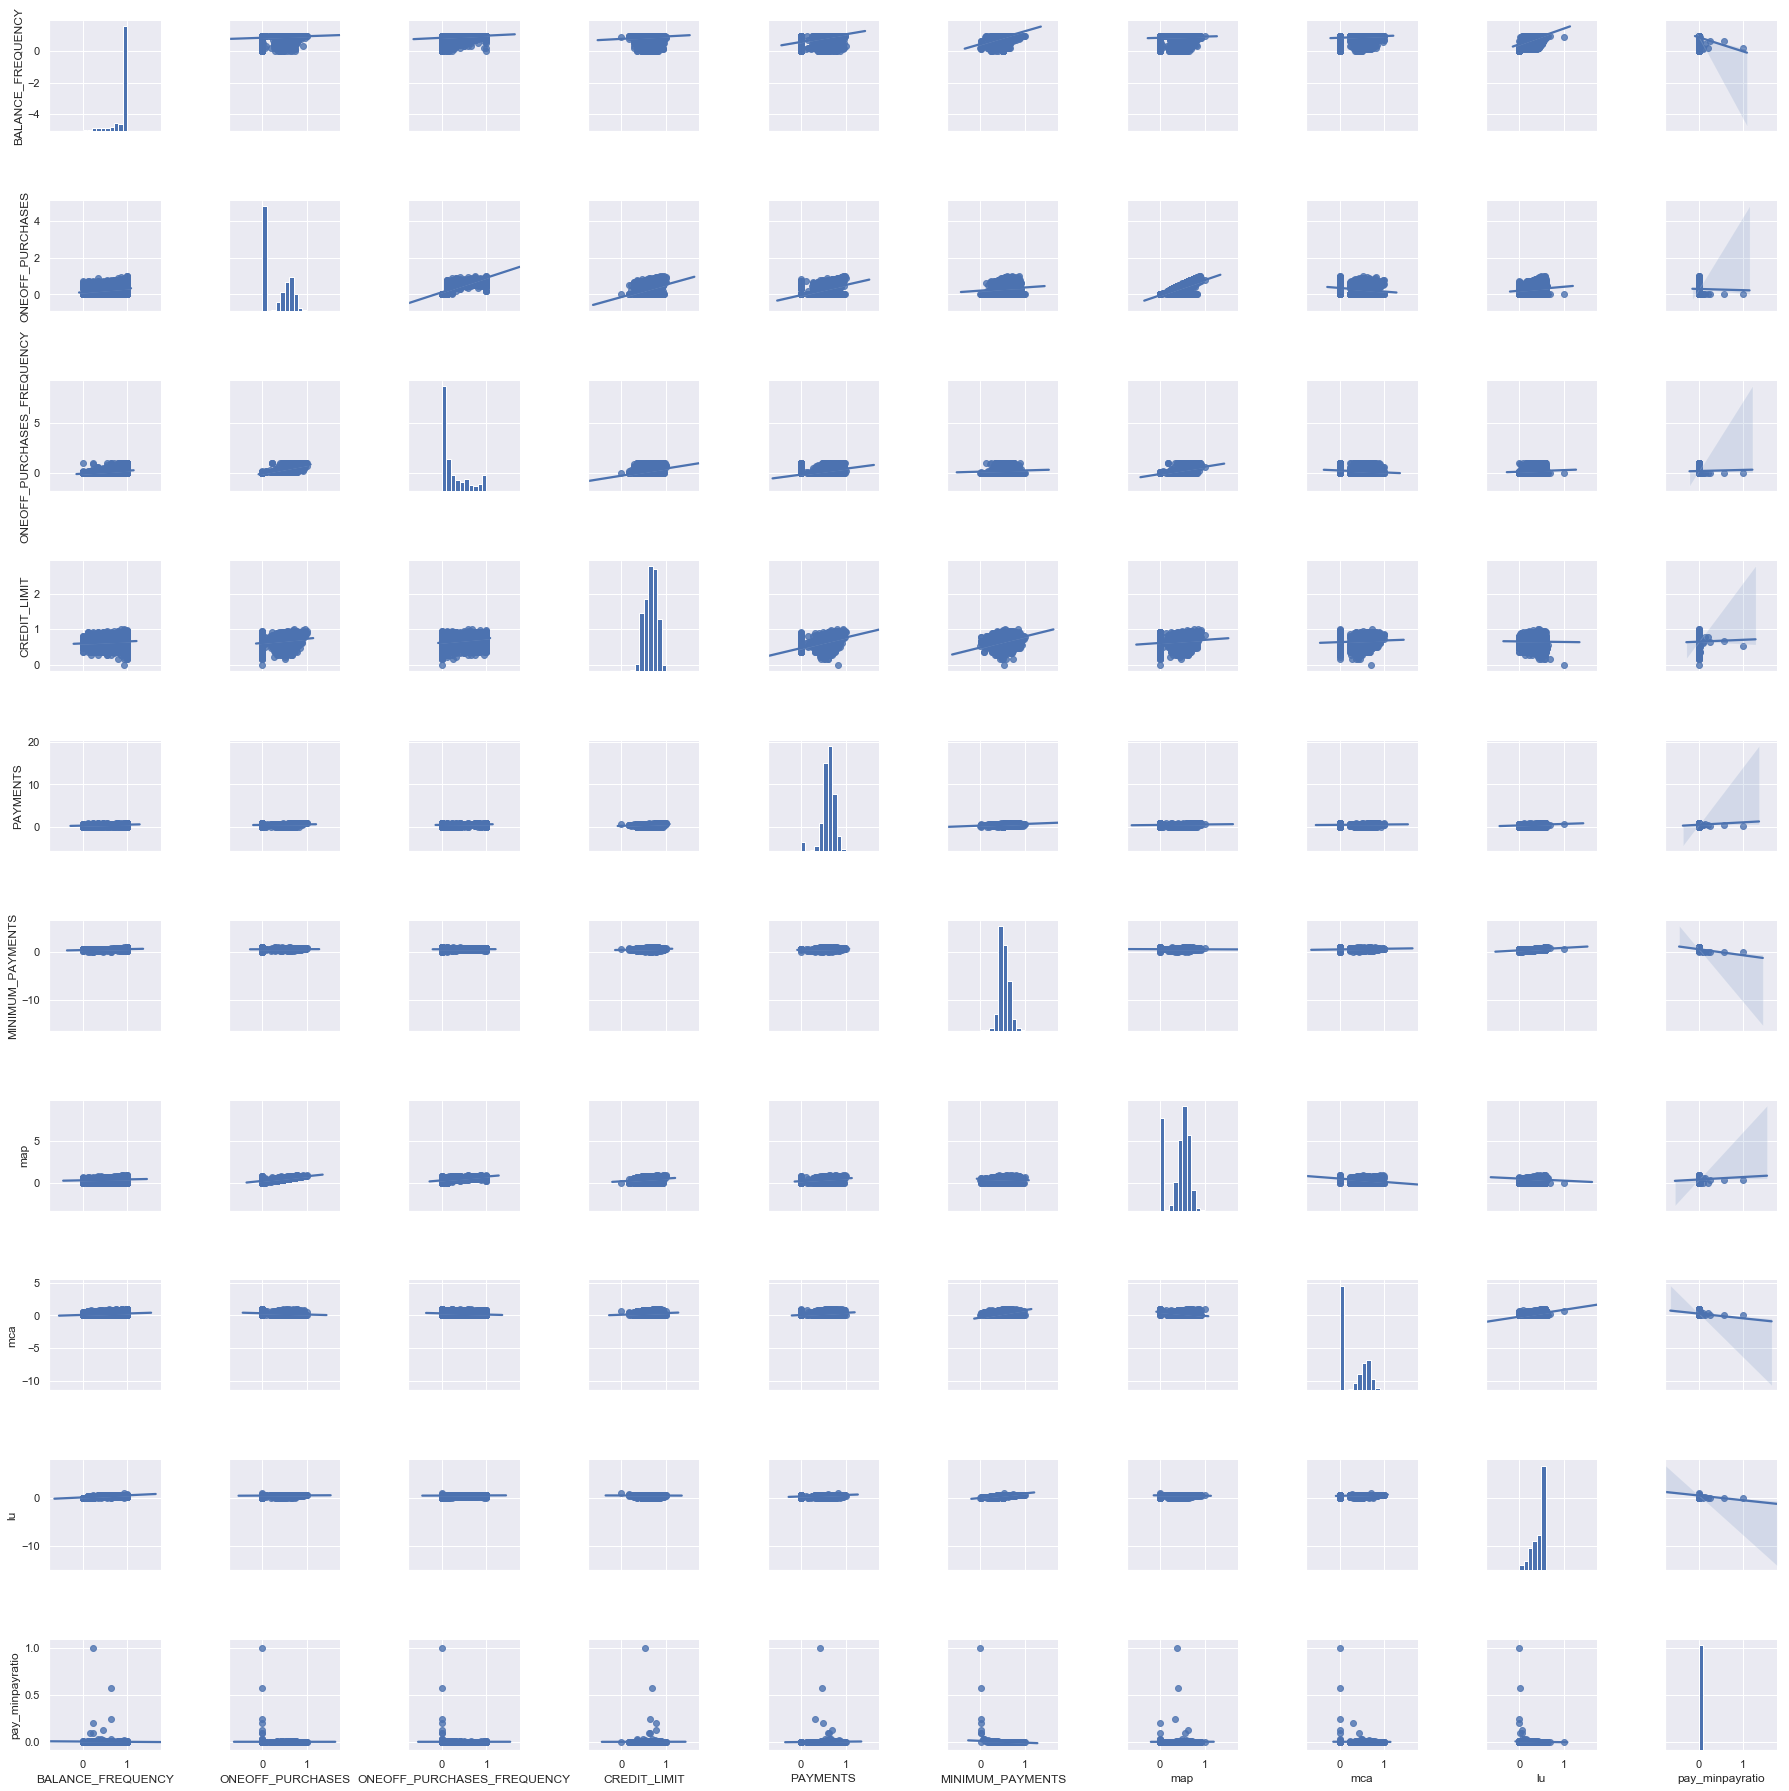

In [26]:
# Let's check the correlation between features by plotting pairplot
sns.set()

sns.pairplot(Final_CreditData, size = 2.5,kind="reg")
plt.show();

#### we can reduce dimention to 6 variables, as we see it is idle choice(Preserving max variance of data, close to 100%)

# Clustering

In [28]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [29]:
# I am going to use elbow method to classify the clusters
Final_CreditData.shape

(8950, 10)

In [30]:
cluster_range = range( 2, 11 )
cluster_errors = []
#This list will contain silhouette scores
scores = []
for num_clusters in cluster_range:
    clusters = KMeans( n_clusters=num_clusters, random_state=123 )
    clusters.fit( Final_CreditData )
    cluster_errors.append( clusters.inertia_ )
    scores.append(metrics.silhouette_score(Final_CreditData, clusters.labels_))

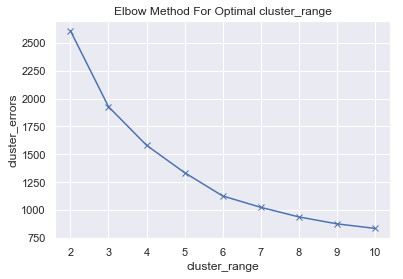

In [31]:
plt.plot(cluster_range, cluster_errors, 'bx-')
plt.xlabel('cluster_range')
plt.ylabel('cluster_errors')
plt.title('Elbow Method For Optimal cluster_range')
plt.show()

#### Observation:
##### i. As we can see that 6 is is giving min error later not much difference. I will go for 6 clusters.

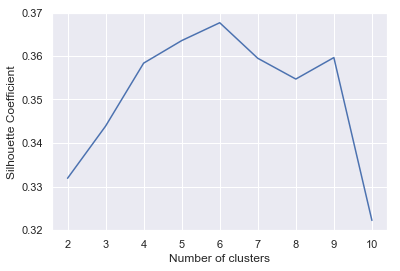

In [33]:
plt.plot(cluster_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()
# As observed above, silhouette coefficient is also giving 6 clusters as the optimal solution.

In [34]:
# I will start with, n_clusters as 4.
model=KMeans(n_clusters=6,random_state=123)

In [35]:
model.fit(Final_CreditData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [36]:
model.labels_

array([1, 2, 3, ..., 1, 2, 3])

In [37]:
pd.Series(model.labels_).value_counts()

2    2375
5    1560
1    1492
0    1474
3    1303
4     746
dtype: int64

In [38]:
# Split the data into train and test data set
from sklearn.model_selection import train_test_split
np.random.seed(0)
rndm = np.random.rand(len(Final_CreditData)) < 0.8
df_X = Final_CreditData[rndm]
df_Y = Final_CreditData[~rndm]

In [39]:
# Covert data frame into numpy
X = np.array(df_X)
Y = np.array(df_Y)

In [40]:
model = KMeans(n_clusters=6, random_state=0).fit(df_X)
pred = model.predict(Y)
df_Y['PREDICTED_CLUSTER'] = pred
train_summary = df_Y.groupby(by='PREDICTED_CLUSTER').mean()
train_summary

D:\Python3_AI\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BALANCE_FREQUENCY,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,map,mca,lu,pay_minpayratio
PREDICTED_CLUSTER,,,,,,,,,,
0,0.943450,0.004218,0.001925,0.591852,0.566497,0.494902,0.509274,0.010862,0.383696,0.004700
1,0.953193,0.553939,0.321791,0.682478,0.656706,0.579620,0.544580,0.592621,0.528312,0.004533
2,0.914837,0.546556,0.261023,0.659096,0.607469,0.501914,0.551324,0.006063,0.437427,0.004889
3,0.937912,0.003941,0.001541,0.639732,0.617788,0.558315,0.080911,0.579987,0.529572,0.004460
4,0.980469,0.697827,0.861821,0.730812,0.698849,0.522994,0.651940,0.115347,0.452466,0.005418
5,0.328416,0.132752,0.040859,0.624123,0.458665,0.418916,0.360245,0.094788,0.179422,0.004769


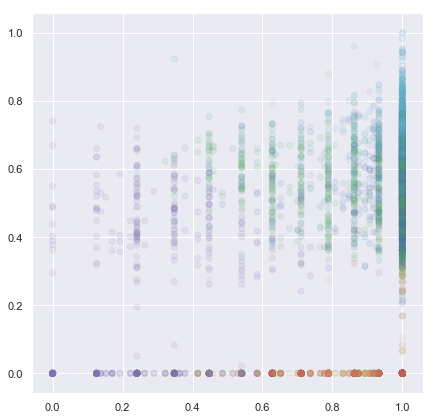

In [41]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'c',5:'m'}
label_color=[color_map[l] for l in model.labels_]
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],c=label_color,cmap='Spectral',alpha=0.1)

### Observation:
#### As we can see clusters are forming quite far away and some overlapings are there.

## DBSCAN Algorithm

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
model = DBSCAN(eps=0.4, min_samples=4).fit(df_X)
pred = model.fit_predict(Y)
df_Y['PREDICTED_CLUSTER'] = pred
train_summary = df_Y.groupby(by='PREDICTED_CLUSTER').mean()
train_summary

D:\Python3_AI\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BALANCE_FREQUENCY,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,map,mca,lu,pay_minpayratio
PREDICTED_CLUSTER,,,,,,,,,,
-1,0.669265,0.526175,0.508490,0.665355,0.205150,0.488882,0.586810,0.379089,0.362799,0.002959
0,0.897147,0.296782,0.226561,0.653549,0.622999,0.524536,0.418672,0.273489,0.448708,0.004831
1,0.972499,0.571762,0.199533,0.735242,0.000000,0.510325,0.521270,0.615703,0.504473,0.000000
2,0.204963,0.000000,0.000000,0.630482,0.000000,0.510325,0.000000,0.619157,0.281413,0.000000
3,1.000000,0.628886,0.321466,0.657949,0.000000,0.510325,0.630528,0.000000,0.447219,0.000000


#### Obsrvation DBSCAN:
i. Points are assigned to 5 clusters.

# Observations and Suggested Marketing Strategies

### a. Group -1
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score(Limit Usage) comparatively it's low to other clusters. Monthly Average purchase is also not very high but average(Still Balance is low)
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyalty cards to increase transactions
       
### b. Group 0
   - Their credit score close to average (0.44), we need more information on this set to make further decisions. (Since their Credit limit and payments is above average.)
   
### c. Group 1
   - This group has a minimum paying ratio and uses cards for just one off transactions (may be for utility bills only). This group seems to be risky group.(And they have high credit limit, so definitely something i not going right for this group in recent times)
   
### d. Group 2
  - This group is performing best among all as customers are maintaining good credit scores and paying dues on time.
      -- Increasing credit limit or giving premium cards offer will be justifiable for this group.

### e. Group 3
  - Their credit score close to average (0.44), we need more information on this set to make further decisions. (Since their Credit limit, payments are above average and Balance frequency is also quite high.)
